<a href="https://colab.research.google.com/github/valogonor/DS-Sprint-01-Dealing-With-Data/blob/master/Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

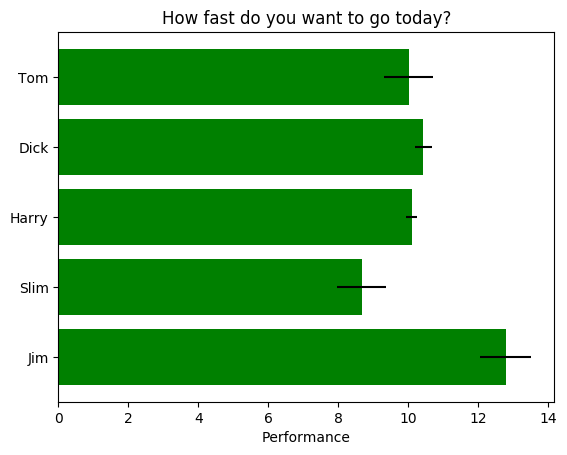

In [1]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

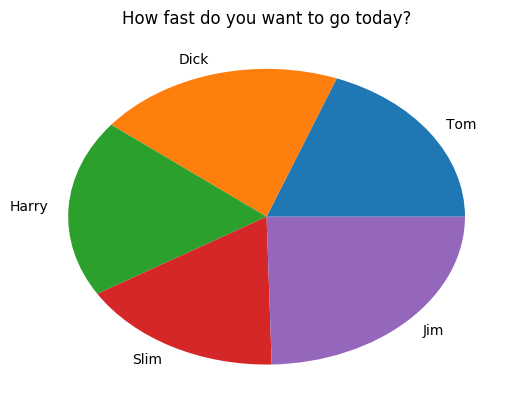

In [2]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


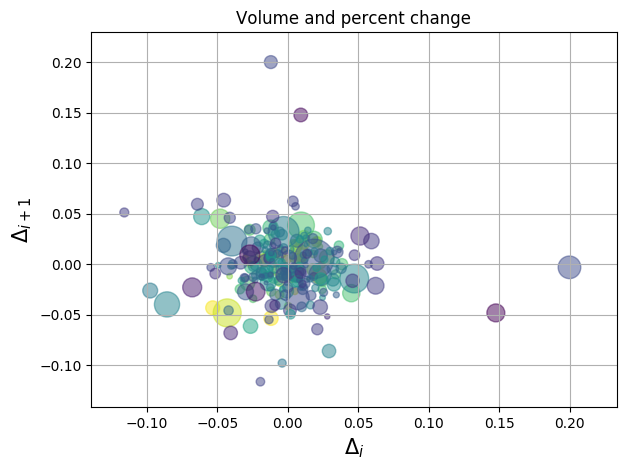

In [3]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

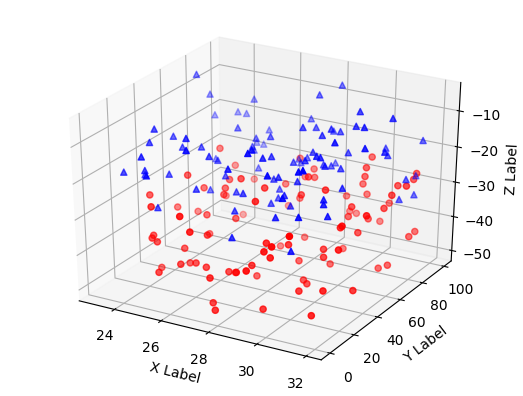

In [4]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [5]:
import pandas as pd
adult_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adult_data = pd.read_csv(adult_data_url, header=None)
print(adult_data.shape)
adult_data.head()

(32561, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
import numpy as np
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
adult_data = pd.read_csv(adult_data_url, header=None, names=columns, na_values=[' ?']) # had to add a space before the ? to get it to work
adult_data[adult_data.isnull().any(axis=1)]
adult_data_dropped = adult_data.dropna() # dropped rows with nans because there's still plenty of data relative to the dropped rows.
print(adult_data_dropped.shape)
adult_data_dropped.head()

(30162, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# turning income into  0 or 1
adult_data_dropped.income.replace(' <=50K', 0, inplace=True)
adult_data_dropped.income.replace(' >50K', 1, inplace=True)
adult_data_dropped.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [8]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

# x = np.array(adult_data_dropped.education_num)
# y = np.array(adult_data_dropped.income)
# inputs = np.column_stack([x, y])
# # print(inputs)
# model.fit(inputs, y)
# predictions = model.predict(inputs)

adult_data_dropped.groupby(['education_num', 'income']).count()

# plt.scatter(adult_data_dropped.education_num, adult_data_dropped.income)
# plt.show()

age  workclass  fnlwgt  education  marital_status  \
education_num income                                                       
1             0         45         45      45         45              45   
2             0        145        145     145        145             145   
              1          6          6       6          6               6   
3             0        276        276     276        276             276   
              1         12         12      12         12              12   
4             0        522        522     522        522             522   
              1         35         35      35         35              35   
5             0        430        430     430        430             430   
              1         25         25      25         25              25   
6             0        761        761     761        761             761   
              1         59         59      59         59              59   
7             0        989        989     989        989             989   
              1         59         59      59         59              59   
8             0        348        348     348        348             348   
              1         29         29      29         29              29   
9             0       8223       8223    8223       8223            8223   
              1       1617       1617    1617       1617            1617   
10            0       5342       5342    5342       5342            5342   
              1       1336       1336    1336       1336            1336   
11            0        963        963     963        963             963   
              1        344        344     344        344             344   
12            0        752        752     752        752             752   
              1        256        256     256        256             256   
13            0       2918       2918    2918       2918            2918   
              1       2126       2126    2126       2126            2126   
14            0        709        709     709        709             709   
              1        918        918     918        918             918   
15            0        136        136     136        136             136   
              1        406        406     406        406             406   
16            0         95         95      95         95              95   
              1        280        280     280        280             280   

                      occupation  relationship  race   sex  capital_gain  \
education_num income                                                       
1             0               45            45    45    45            45   
2             0              145           145   145   145           145   
              1                6             6     6     6             6   
3             0              276           276   276   276           276   
              1               12            12    12    12            12   
4             0              522           522   522   522           522   
              1               35            35    35    35            35   
5             0              430           430   430   430           430   
              1               25            25    25    25            25   
6             0              761           761   761   761           761   
              1               59            59    59    59            59   
7             0              989           989   989   989           989   
              1               59            59    59    59            59   
8             0              348           348   348   348           348   
              1               29            29    29    29            29   
9             0             8223          8223  8223  8223          8223   
              1             1617          1617  1617  1617          1617   
10            0             5342          5342  5342  5342          53

In [62]:
# df = adult_data_dropped.groupby(['education_num', 'income']).count()
# for i in df:
#   count = 0
#   count_high = 0
low_income_count = []
for j in sorted(adult_data_dropped.education_num.unique()):
  for i in adult_data_dropped.groupby(['education_num', 'income']).count():
    array = adult_data_dropped.groupby(['education_num', 'income']).count().loc[j].loc[0].value_counts().to_dict()
  for key in array:
    low_income_count.append(key)
print(low_income_count)
high_income_count = [0]
array = {}
for j in sorted(adult_data_dropped.education_num.unique()):
  for i in adult_data_dropped.groupby(['education_num', 'income']).count():
    if j == 1:
      continue
    else:
      array = adult_data_dropped.groupby(['education_num', 'income']).count().loc[j].loc[1].value_counts().to_dict()
  for key in array:
    high_income_count.append(key)
high_income_count
# adult_data_dropped.groupby(['education_num', 'income']).count().loc[16].loc[1].value_counts().to_dict()

[45, 145, 276, 522, 430, 761, 989, 348, 8223, 5342, 963, 752, 2918, 709, 136, 95]


[0, 6, 12, 35, 25, 59, 59, 29, 1617, 1336, 344, 256, 2126, 918, 406, 280]

In [10]:
'''
def to_frequency_table(data):
    frequencytable = {}
    for key in data:
        if key in frequencytable:
            frequencytable[key] += 1
        else:
            frequencytable[key] = 1
    return frequencytable
'''
# adult_data_dropped.education_num.value_counts().to_dict()
low_income_count = []
high_income_count = []
for j in sorted(adult_data_dropped.education_num.unique()):
  count = 0
  count_high = 0
  for i in range(32561):
    if i not in adult_data_dropped.education_num:
      continue;
    elif adult_data_dropped.education_num.loc[i] == j and adult_data_dropped.income.loc[i] == 0:
      count += 1
    elif adult_data_dropped.education_num.loc[i] == j and adult_data_dropped.income.loc[i] == 1:
      count_high += 1
  low_income_count.append(count)
  high_income_count.append(count_high)
print(low_income_count)
print(high_income_count)

[45, 145, 276, 522, 430, 761, 989, 348, 8223, 5342, 963, 752, 2918, 709, 136, 95]
[0, 6, 12, 35, 25, 59, 59, 29, 1617, 1336, 344, 256, 2126, 918, 406, 280]


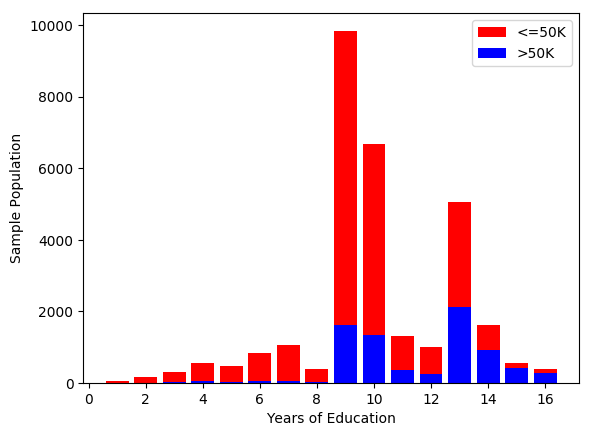

In [11]:
education_num = sorted(adult_data_dropped.education_num.unique())
# for i in range(32):
#   education_num.append(i//2 + 1)
# education_num = [sorted(adult_data_dropped.education_num.unique())*2]
x = education_num
x2 = education_num
# adult_data_dropped.groupby(['education_num','income']).size()
low_income_count = [45, 145, 276, 522, 430, 761, 989, 348, 8223, 5342, 963, 752, 2918, 709, 136, 95]
high_income_count = [0, 6, 12, 35, 25, 59, 59, 29, 1617, 1336, 344, 256, 2126, 918, 406, 280]
plt.bar(x, low_income_count, bottom=high_income_count, label='<=50K', color='r')
plt.bar(x2, high_income_count, label='>50K', color='b')
plt.xlabel('Years of Education')
plt.ylabel('Sample Population')
plt.legend()
plt.show()

In [12]:
adult_data_dropped.groupby(['race','income']).size()

race                 income
 Amer-Indian-Eskimo  0           252
                     1            34
 Asian-Pac-Islander  0           647
                     1           248
 Black               0          2451
                     1           366
 Other               0           210
                     1            21
 White               0         19094
                     1          6839
dtype: int64

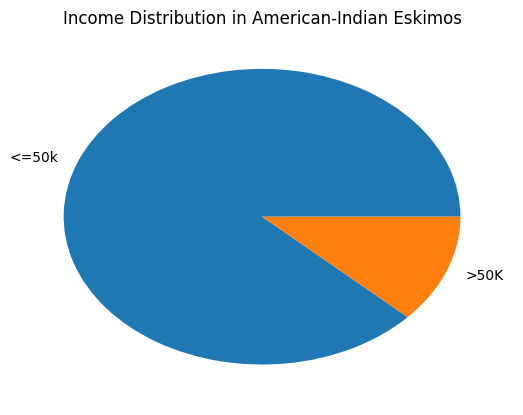

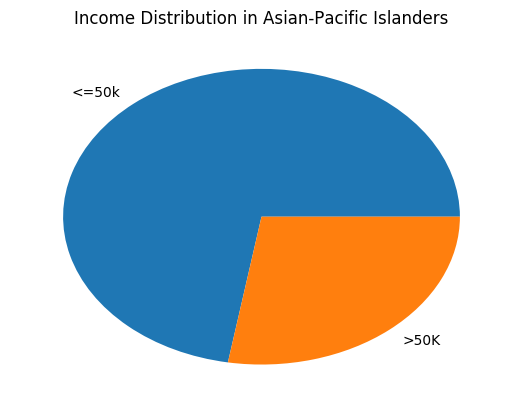

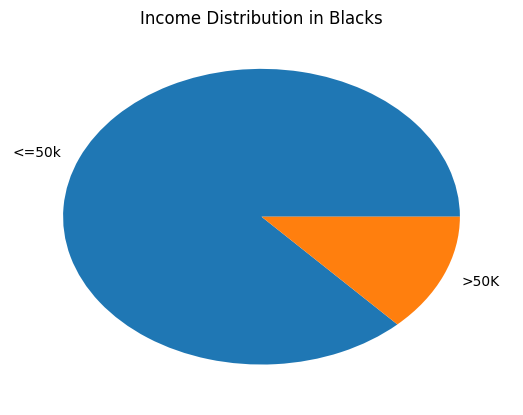

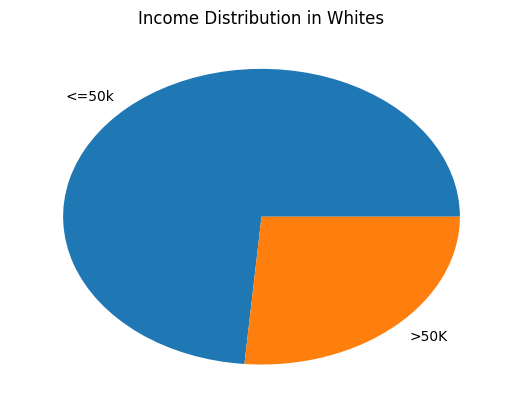

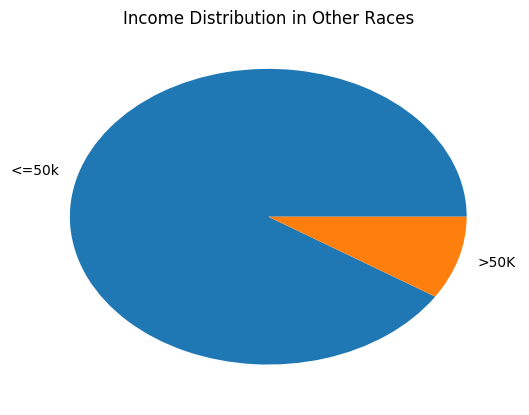

In [13]:
slices = [252, 34]
income = ['<=50k', '>50K']
plt.pie(slices, labels=income)
plt.title('Income Distribution in American-Indian Eskimos')
plt.show()
slices = [647, 248]
income = ['<=50k', '>50K']
plt.pie(slices, labels=income)
plt.title('Income Distribution in Asian-Pacific Islanders')
plt.show()
slices = [2451, 366]
income = ['<=50k', '>50K']
plt.pie(slices, labels=income)
plt.title('Income Distribution in Blacks')
plt.show()
slices = [19094, 6839]
income = ['<=50k', '>50K']
plt.pie(slices, labels=income)
plt.title('Income Distribution in Whites')
plt.show()
slices = [210, 21]
income = ['<=50k', '>50K']
plt.pie(slices, labels=income)
plt.title('Income Distribution in Other Races')
plt.show()

In [14]:
adult_data_dropped.groupby(['sex', 'income']).count()
# df = adult_data_dropped
# df = df['sex'].value_counts()
# # df.columns = ['sex', 'count']
# print(df)


age  workclass  fnlwgt  education  education_num  \
sex     income                                                       
 Female 0        8670       8670    8670       8670           8670   
        1        1112       1112    1112       1112           1112   
 Male   0       13984      13984   13984      13984          13984   
        1        6396       6396    6396       6396           6396   

                marital_status  occupation  relationship   race  capital_gain  \
sex     income                                                                  
 Female 0                 8670        8670          8670   8670          8670   
        1                 1112        1112          1112   1112          1112   
 Male   0                13984       13984         13984  13984         13984   
        1                 6396        6396          6396   6396          6396   

                capital_loss  hours_per_week  native_country  
sex     income                                                
 Female 0               8670            8670            8670  
        1               1112            1112            1112  
 Male   0              13984           13984           13984  
        1               6396            6396            6396

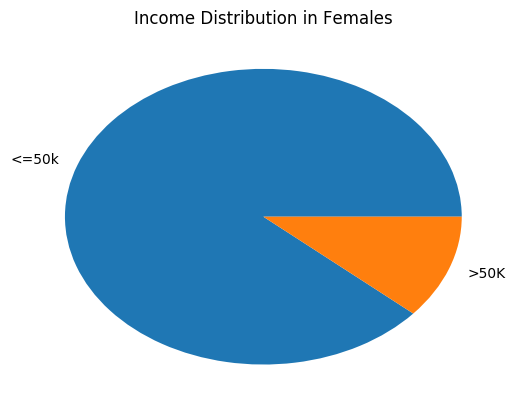

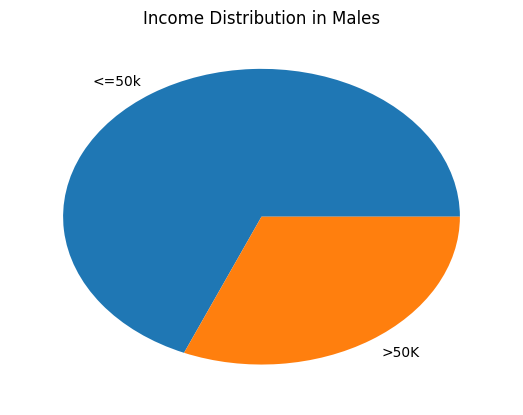

In [15]:
slices = [8670, 1112]
income = ['<=50k', '>50K']
plt.pie(slices, labels=income)
plt.title('Income Distribution in Females')
plt.show()
slices = [13984, 6396]
income = ['<=50k', '>50K']
plt.pie(slices, labels=income)
plt.title('Income Distribution in Males')
plt.show()